In [1]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid12/yolov8_vid12.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object

In [2]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid12/yolov5-vid12.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [3]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid12/yolov3_vid12.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [4]:
#detectron

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid12/detectron_12.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_det_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_det_df)

            Object  Confidence
0            apple    0.433909
1         backpack    0.144043
2     baseball bat    0.303931
3   baseball glove    0.194318
4            bench    0.112320
5          bicycle    0.150203
6             bird    0.157458
7           bottle    0.071176
8              car    0.095203
9              cat    0.062419
10      cell phone    0.098086
11           chair    0.147393
12           clock    0.095282
13             cup    0.063192
14             dog    0.186220
15    fire hydrant    0.104869
16         frisbee    0.080861
17         handbag    0.108713
18      motorcycle    0.404930
19           mouse    0.130730
20   parking meter    0.068740
21          person    0.998014
22    potted plant    0.074370
23          remote    0.104118
24      skateboard    0.452796
25            skis    0.107662
26       snowboard    0.069946
27     sports ball    0.106124
28        suitcase    0.123492
29   tennis racket    0.129060
30   traffic light    0.074026
31      

In [5]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid12/vid12-ssd.csv'
necessary_objects_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/classesForSSD.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]

In [6]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df
df5 = mean_confidence_det_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() +
                           df4['Object'].tolist() + df5['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.merge(df5, on='Object', how='left').rename(columns={'Confidence': 'Confidence_5'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:12]
print(combined_df)
# Now combined_df has one column for objects and three columns for confidences

            Object  Confidence_1  Confidence_2  Confidence_3  Confidence_4  \
0     baseball bat      0.326518      0.000000      0.000000      0.236426   
1              dog      0.434149      0.366938      0.000000      0.156104   
2       motorcycle      0.342822      0.000000      0.000000      0.222440   
3           person      0.886608      0.871251      0.879209      0.725158   
4       skateboard      0.436072      0.435505      0.473279      0.354137   
5          bicycle      0.000000      0.254382      0.327923      0.258203   
6            horse      0.000000      0.422674      0.000000      0.149514   
7    tennis racket      0.000000      0.318261      0.000000      0.241418   
8          giraffe      0.000000      0.000000      0.278444      0.123468   
9         airplane      0.000000      0.000000      0.000000      0.206956   
10        backpack      0.000000      0.000000      0.000000      0.235687   
11  baseball glove      0.000000      0.000000      0.000000    

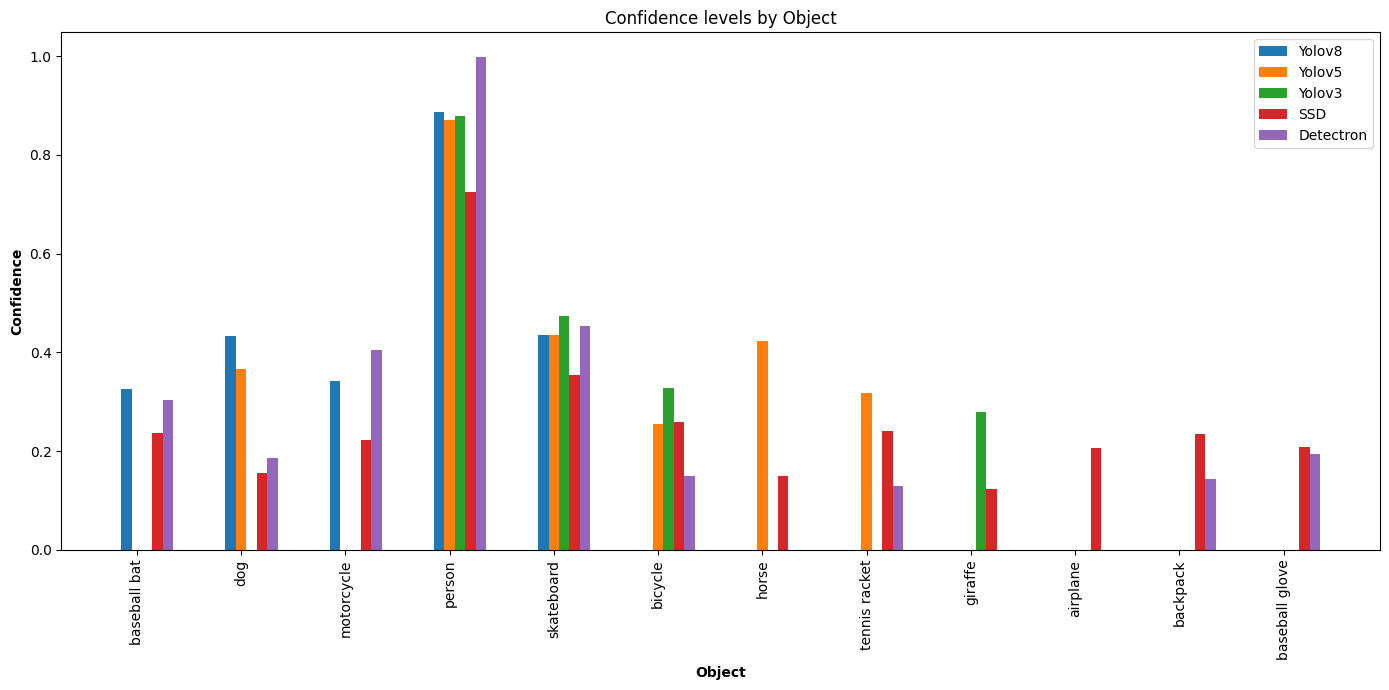

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.10

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')
plt.bar(index + 4*bar_width, combined_df['Confidence_5'], width=bar_width, label='Detectron')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')


# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()